# 数据分析－泰坦尼克号生还分析

## 提出问题

### 影响乘客生还的因素很多，我尤其对乘客的性别、年龄、舱位感兴趣
1. 性别是否会影响生还率？
2. 年龄是否会影响生还率？
3. 舱位是否会影响生还率？
4. 性别和舱位共同对生还率的影响  
性别、年龄、舱位是三个自变量，生还率是因变量


## 数据加工

### 导入包

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from __future__ import division
%matplotlib inline

### 导入包

In [31]:
filename='../data/titanic_data.csv'
titanic_df=pd.read_csv(filename)

观察数据格式  
* PassengerID => 乘客ID
* Survived    => 是否生还
* Pclass      => 乘客所处等级
* Name        => 乘客姓名
* Sex         => 性别
* Age         => 年龄
* SibSp       => 堂兄弟/妹个数
* Parch       => 父母与小孩个数
* Ticket      => 船票信息
* Fare        => 票价
* Cabin       => 客舱
* Embarked    => 登船港口


In [32]:
#查看前几行数据，了解数据信息，观察数据格式
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# 查看数据的摘要信息
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从数据的描述中可以发现，乘客生还率在百分之三十八左右，1等舱和2等舱乘客加在一起的数量超过百分之25，小于百分之五十。年龄信息缺失较多，未缺失绝体年龄信息的乘客大致年龄在30岁左右，绝大多数乘客年龄在38岁以下。

### 数据清洗

In [34]:
#查看哪些字段存在数据缺失的情况
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上图可以发现年龄和舱位以及登陆港口存在数据缺失现象，年龄信息需要在下面的数据分析中运用到，需要对它的缺失值进行处理
### 处理缺失值  
这里采用平均年龄处理缺失值

In [35]:
# 获取平均年龄
passenger_mean_age=titanic_df['Age'].mean()

#用平均年龄填充缺失值
titanic_df['Age'].fillna(passenger_mean_age,inplace=True)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 处理性别数据  
性别数据是字符串，将其转换为数值

In [55]:
#用0代表男性，1代表女性，性别数值化
titanic_df['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic_df.head()
#titanic_df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### 数据探索

In [56]:
#获取生还乘客的数据
survived_passenegr_df=titanic_df[titanic_df.Survived==1]

In [71]:
# 打印均值
def print_describe(name,label):
    print '全体乘客的'+label+":"
    print '平均值'+str(titanic_df[name].mean())
    print '最小值'+str(titanic_df[name].min())
    print '最大值'+str(titanic_df[name].max())
    print ""
    print '生还乘客'+label+":"
    print '平均值'+str(survived_passenegr_df[name].mean())
    print '最小值'+str(survived_passenegr_df[name].min())
    print '最大值'+str(survived_passenegr_df[name].max())
# 计算每组人数
def group_passenger_count(data,name):
    # 按照name对乘客进行分组后，每个组的人数
    return data.groupby(name)['PassengerId'].count()

#计算每个组的生还率
def group_passenger_survival_rate(name):
    group_all_passenger_count=group_passenger_count(titanic_df,name)
    group_survived_passenger_count=group_passenger_count(survived_passenegr_df,name)
    return group_survived_passenger_count/group_all_passenger_count

#饼图
def print_pie(group_data,title):
    # 按照name对乘客进行分组后，每个组的人数
    group_data.plot.pie(title=title,figsize=(6, 6),autopct='%3.1f%%',startangle = 90,legend=True)

#def print_pie(group_data,title):
    #group_data.plot.pie(title=title,figsize=(6,6),autopct='%3.1f%%',startangle=90,legend=True)

#柱状图
def print_bar(data,title):
    bar=data.plot.bar(title=title)
    for p in bar.patches:
        bar.annotate('%3.1f%%' % (p.get_height()*100), (p.get_x() * 1.005, p.get_height() * 1.005))

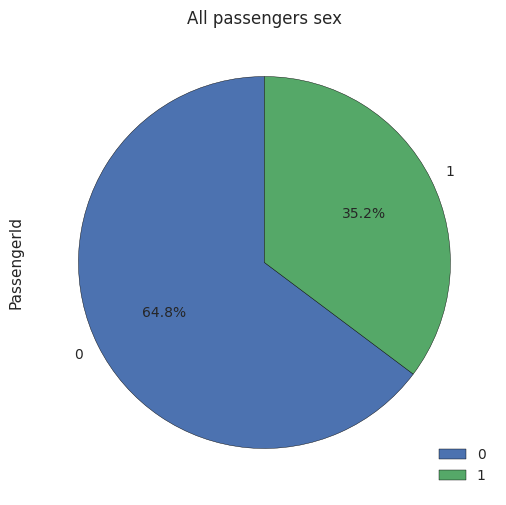

In [72]:
#性别对生还率的影响
print_pie(group_passenger_count(titanic_df,'Sex'),'All passengers sex')

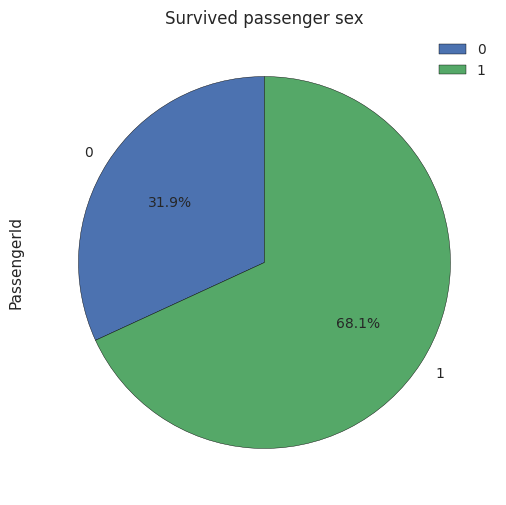

In [73]:
# 生还乘客的性别比例
print_pie(group_passenger_count(survived_passenegr_df,'Sex'),'Survived passenger sex')

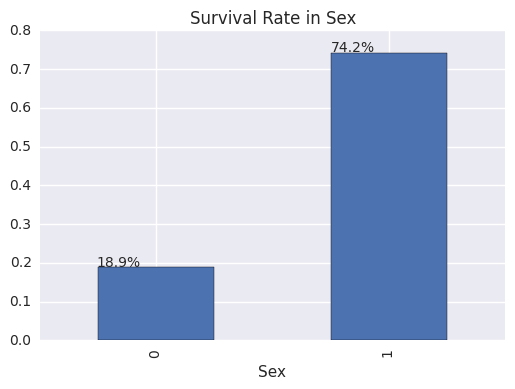

In [74]:
# 不同性别的生还率
print_bar(group_passenger_survival_rate('Sex'),'Survival Rate in Sex')

全部乘客中，女性的比例只占到35.2%，而女性的生还比例却高达68.1%  
女性最终生还率达到74.2%，而男性生还率只有18.9%  
可以得出，女性生还率更高  

### 年龄对生还率的影响

In [75]:
#两者年龄信息比较
print_describe('Age','年龄')

全体乘客的年龄:
平均值29.6991176471
最小值0.42
最大值80.0

生还乘客年龄:
平均值28.5497781218
最小值0.42
最大值80.0


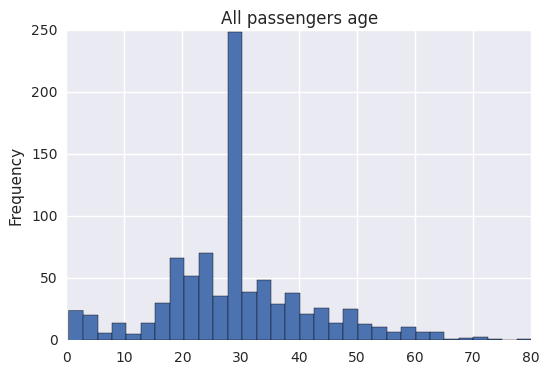

In [78]:
# 全体乘客年龄的直方图
titanic_df['Age'].plot.hist(bins=32,title='All passengers age')

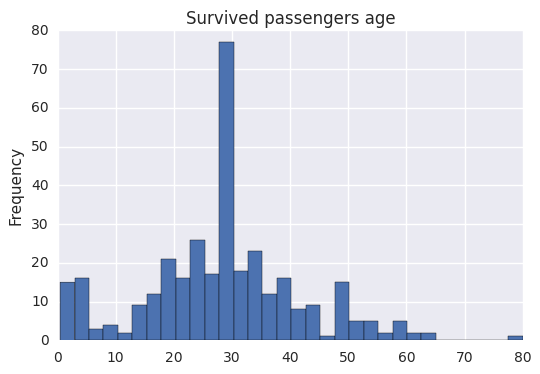

In [79]:
# 生还乘客年龄的直方图
survived_passenegr_df['Age'].plot.hist(bins=32,title='Survived passengers age')

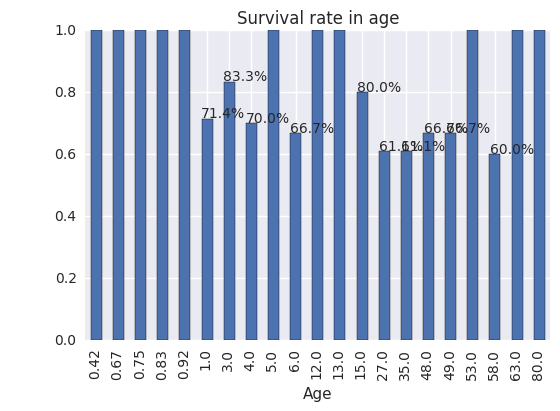

In [87]:
#不同年龄的生还率
group_age_survival_rate=group_passenger_survival_rate('Age')
#过滤掉生还率小于50%的年龄
group_age_survival_rate=group_age_survival_rate[group_age_survival_rate>0.5]
#显示生还率50%以上柱状图
print_bar(group_age_survival_rate,'Survival rate in age')

从图中可以得知，从生还率在百分之五十以上年龄来看，0-6岁、12-15岁、53岁、63岁、80岁生还率很高

### 舱位对生还率的影响

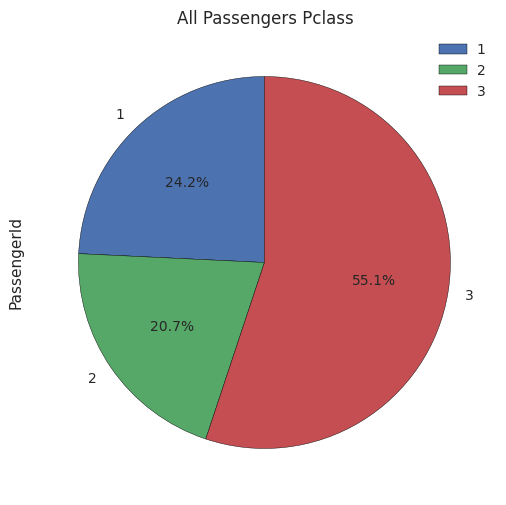

In [88]:
# 全部乘客的舱位比例
print_pie(group_passenger_count(titanic_df,'Pclass'),'All Passengers Pclass')

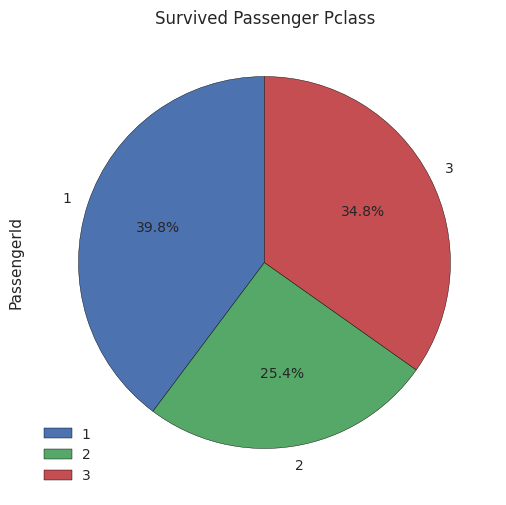

In [89]:
# 生还乘客的舱位比例
print_pie(group_passenger_count(survived_passenegr_df,'Pclass'),'Survived Passenger Pclass')

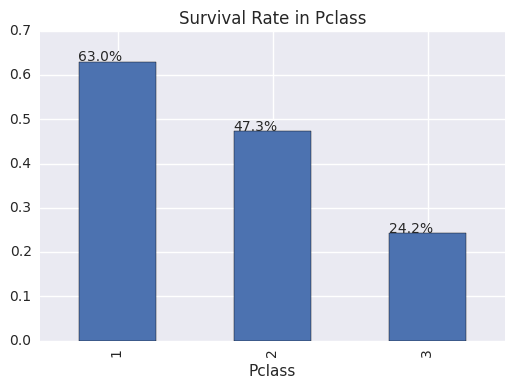

In [92]:
# 不同舱位的生还率
print_bar(group_passenger_survival_rate('Pclass'),'Survival Rate in Pclass')

从中发现，在所有乘客中，三等舱的乘客最多，占到55.1%，一等舱和二等舱乘客所占比例接近于一致。但在生还的乘客中，一等舱的乘客却最多。  
从不同舱位生还率比例发现，一等舱生还率最高，达到63%，其次是二等舱，最后是三等舱

### 性别和舱位共同对生还率的影响

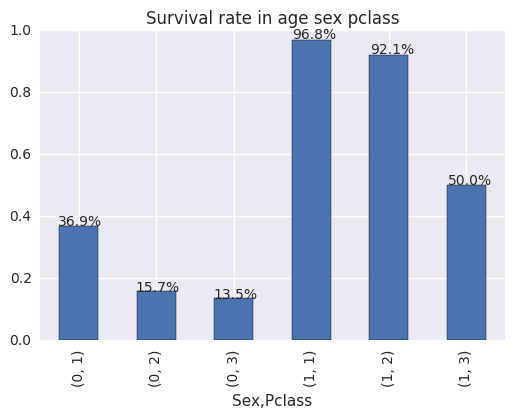

In [98]:
# 不同性别和舱位的生还率
print_bar(group_passenger_survival_rate(['Sex','Pclass']),'Survival rate in age sex pclass')

从图中可以发现，对生还率影响最大的是性别因素，女性生还率高过男性，其次是舱位因素，头等舱生还率大于二等舱生还率，二等舱的生还率又大于三等舱的生还率。

## 结论
ton